In [21]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd # type: ignore

# Load dataset
df = pd.read_csv('final cleaned dataset.csv', index_col='datetime') # date time will be the identifier of the data points
df

,main.temp,main.pressure,main.humidity,clouds.all,wind.speed,weather.Clear,weather.Clouds,weather.Mist,weather.Rain,weather.Smoke
datetime,,,,,,,,,,
2023-11-06 15:45:57,33.36,1010.0,68.0,20.0,4.02,0.0,1.0,0.0,0.0,0.0
2023-11-06 15:47:35,30.00,1009.0,74.0,81.0,2.06,0.0,1.0,0.0,0.0,0.0
2023-11-06 15:38:29,33.32,1010.0,66.0,20.0,2.57,0.0,1.0,0.0,0.0,0.0
2023-11-06 15:39:56,33.33,1010.0,66.0,50.0,0.89,0.0,1.0,0.0,0.0,0.0
2023-11-06 18:01:20,31.10,1010.0,72.0,20.0,4.12,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2024-05-31 18:10:02,32.04,1011.0,78.0,65.0,1.79,0.0,1.0,0.0,0.0,0.0
2024-05-31 21:06:54,30.73,1013.0,80.0,100.0,2.68,0.0,1.0,0.0,0.0,0.0
2024-05-31 21:08:22,28.21,1013.0,86.0,47.0,1.63,0.0,1.0,0.0,0.0,0.0


In [22]:
# Separate features (except temperature) into weather_x
camanava_x = df.drop(columns=['main.temp']) # Inputs

# Separate temperature column into weather_y
camanava_y = df[['main.temp']] # Target feature

# Display the shapes of the new DataFrames
print("Shape of camanava_x:", camanava_x.shape)
print("Shape of camanava_y:", camanava_y.shape)


Shape of camanava_x: (5539, 9)
Shape of camanava_y: (5539, 1)


# Multiple Linear Regression

In [23]:
# Splitting based on temporal data 
import matplotlib.pyplot as plt # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore

datasplit = int(len(camanava_x) * 0.8)

# Split the features
X_train = camanava_x[:datasplit]
X_test = camanava_x[datasplit:]

# Split the target variable
y_train = camanava_y[:datasplit]
y_test = camanava_y[datasplit:]

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4431, 9)
Shape of X_test: (1108, 9)
Shape of y_train: (4431, 1)
Shape of y_test: (1108, 1)


In [24]:
X_test

,main.pressure,main.humidity,clouds.all,wind.speed,weather.Clear,weather.Clouds,weather.Mist,weather.Rain,weather.Smoke
datetime,,,,,,,,,
2024-04-16 03:06:53,1013.0,77.0,6.0,2.62,1.0,0.0,0.0,0.0,0.0
2024-04-16 03:08:25,1011.0,75.0,3.0,1.60,1.0,0.0,0.0,0.0,0.0
2024-04-16 03:08:47,1013.0,77.0,6.0,2.38,1.0,0.0,0.0,0.0,0.0
2024-04-16 03:10:13,1013.0,76.0,7.0,1.87,1.0,0.0,0.0,0.0,0.0
2024-04-16 06:06:56,1014.0,77.0,78.0,0.45,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-05-31 18:10:02,1011.0,78.0,65.0,1.79,0.0,1.0,0.0,0.0,0.0
2024-05-31 21:06:54,1013.0,80.0,100.0,2.68,0.0,1.0,0.0,0.0,0.0
2024-05-31 21:08:22,1013.0,86.0,47.0,1.63,0.0,1.0,0.0,0.0,0.0


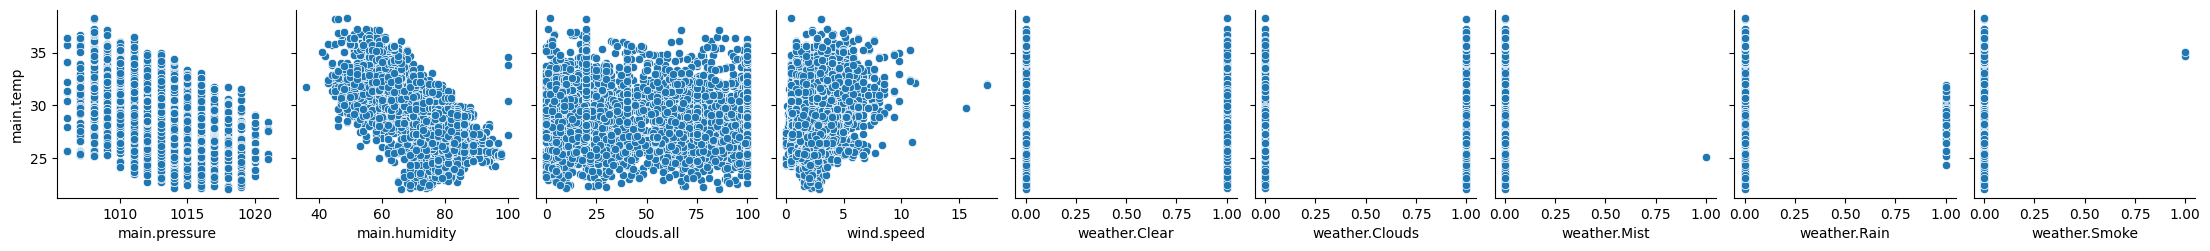

In [25]:

data = pd.concat([camanava_x, camanava_y], axis=1)

# Create pair plot
sns.pairplot(data, y_vars=['main.temp'], x_vars=camanava_x.columns)
plt.show()


In [26]:
# Initialize and train the Linear Regression model
model = LinearRegression() # Adjusts automatically to multiple linear regression if X has multiple features
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred.shape

(1108, 1)

In [27]:
#  Actual and Predicted values along with their differences
results1 = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predicted': y_pred.flatten(), 
    'Difference': (y_test.values - y_pred).flatten()
    })
print("Actual vs Predicted:")
results1.index = X_test.index  
results1


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2024-04-16 03:06:53,27.87,27.036809,0.833191
2024-04-16 03:08:25,27.00,27.779929,-0.779929
2024-04-16 03:08:47,27.87,26.989466,0.880534
2024-04-16 03:10:13,27.84,27.074057,0.765943
2024-04-16 06:06:56,26.93,26.993479,-0.063479
...,...,...,...
2024-05-31 18:10:02,32.04,27.928364,4.111636
2024-05-31 21:06:54,30.73,27.196296,3.533704
2024-05-31 21:08:22,28.21,25.824120,2.385880


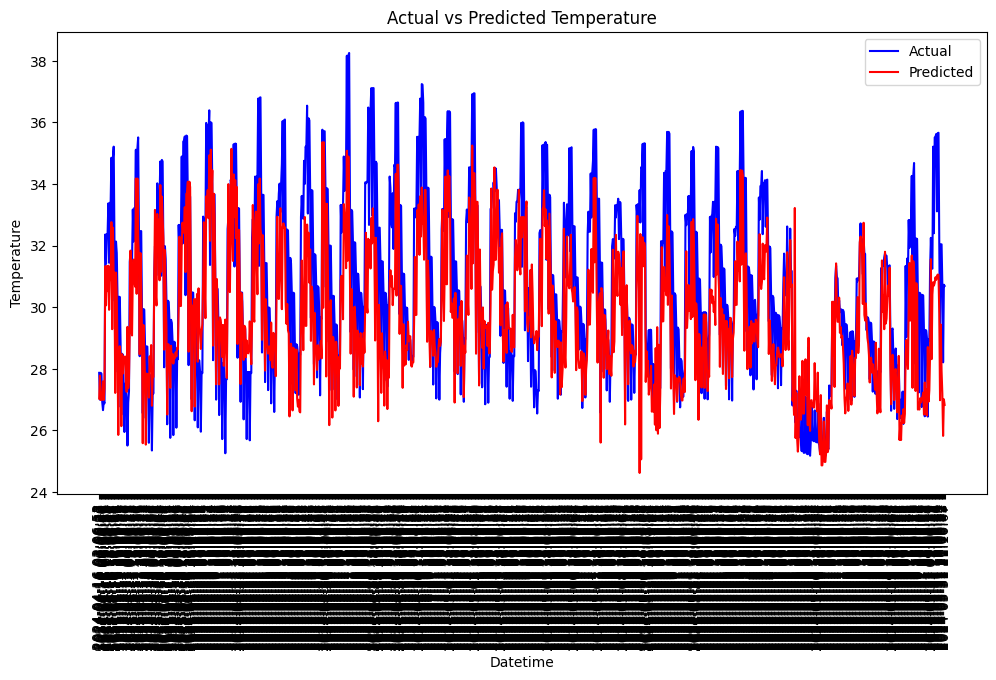

In [28]:

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(results1.index, results1['Actual'], color='blue', label='Actual')
plt.plot(results1.index, results1['Predicted'], color='red', label='Predicted')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()

# Show the plot
plt.show()


# MODEL EVALUATION:

MSE measures the average squared difference between the predicted values and the actual (observed) values

MAE measures the average absolute difference between predicted and actual values, providing a straightforward measure of prediction accuracy.

RMSE measures the square root of the average squared difference between predicted and actual values, providing a comparable metric in the original scale of the data.


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # type: ignore
import numpy as np # type: ignore

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 3.696285266971439
Mean Absolute Error (MAE): 1.5046917052519289
Root Mean Squared Error (RMSE): 1.9225725648129486


In [30]:
import joblib # type: ignore
joblib.dump(model, 'temperature_model.pkl')

['temperature_model.pkl']